In [7]:
from classo.solve_R2 import pathlasso_R2, Classo_R2, problem_R2
from classo.solve_R1 import pathlasso_R1, Classo_R1, problem_R1
from classo.solve_R3 import pathlasso_R3, Classo_R3, problem_R3
from classo.compact_func import Classo, pathlasso
from classo import random_data, classo_problem
import numpy as np
import matplotlib.pyplot as plt

m,d,d_nonzero,k,sigma =150,100,6,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=None)

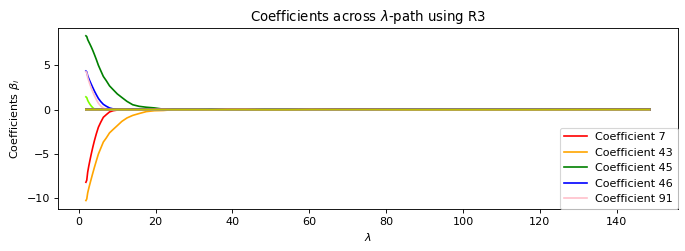

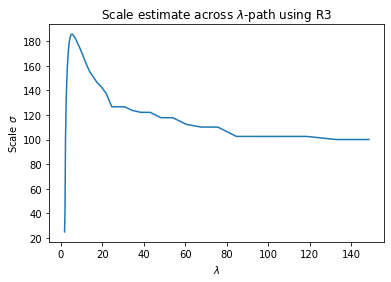


 PATH COMPUTATION : 
   Running time :  3.873s


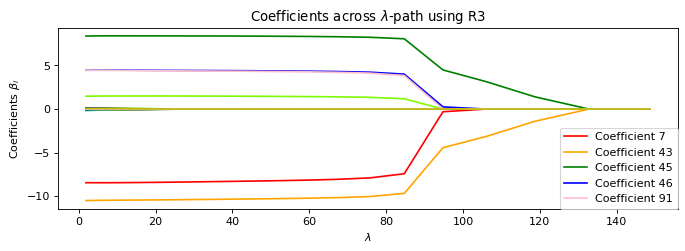

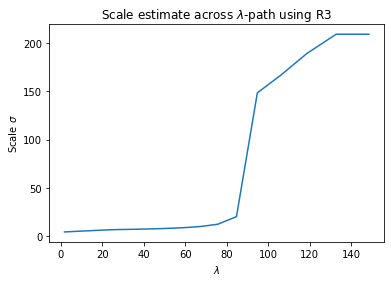


 PATH COMPUTATION : 
   Running time :  0.18s


In [8]:
problem                                     = classo_problem(X,y,C)                           
problem.model_selection.LAMfixed            = False
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False

problem.model_selection.LAMfixedparameters.rescaled_lam = True
problem.model_selection.LAMfixedparameters.lam = 0.3



problem.model_selection.PATHparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.PATH)

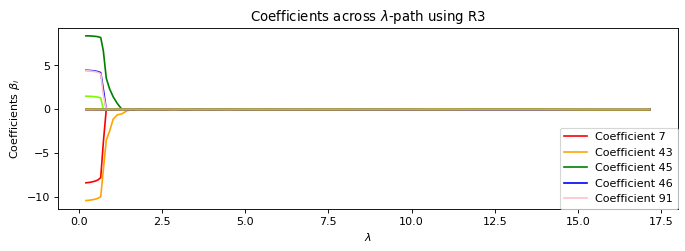

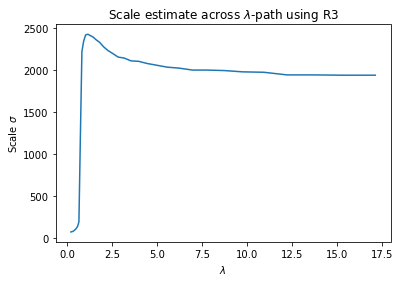


 PATH COMPUTATION : 
   Running time :  6.399s


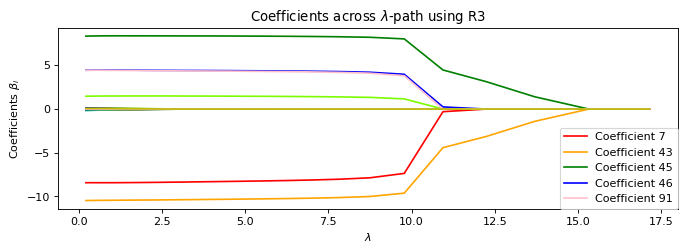

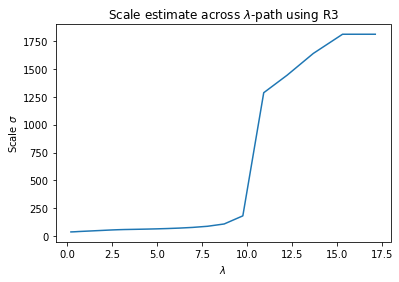


 PATH COMPUTATION : 
   Running time :  0.098s


In [10]:
problem.formulation.e= 1.   
problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.PATH)

problem.model_selection.PATHparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.PATH)

In [ ]:
lam = .1
pb_dr = problem_R3((X,C,y),'DR',e=m/2)
pb_pa = problem_R3((X,C,y),'Path-Alg',e=m/2)
beta_dr, s_dr = Classo_R3(pb_dr, lam)
beta_pa, s_pa = Classo_R3(pb_pa, lam)

In [ ]:
for beta in [beta_pa,beta_dr]:
    plt.bar(range(len(beta)),beta)
    plt.show()

In [ ]:
'''
lam = 20.
e = m/2
ny = np.linalg.norm(y)
i = np.argmax(abs(sol))
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = True

problem.model_selection.CV                  = False
problem.model_selection.LAMfixed            = False
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False

problem.model_selection.LAMfixedparameters.rescaled_lam = False
problem.model_selection.LAMfixedparameters.lam = lam

problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.PATH)
betas= problem.solution.PATH.BETAS
lambdas= problem.solution.PATH.LAMBDAS

problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = False

i = 20

beta1 = betas[i]
lambda1 = lambdas[i]
problem.model_selection.LAMfixedparameters.lam = lambda1
problem.solve
beta2 = problem.solution.LAMfixed.beta

for beta in [beta1,beta2,beta1-beta2]:
    plt.bar(range(len(beta)),beta)
    plt.show()
    
BETA, LAMBDA = pathlasso((X,C,y),lambdas=np.linspace(1.,1e-2,100),typ='R3',meth='DR', true_lam = False, e=m/2)

'''

In [ ]:
for beta in [beta_pa,beta_dr]:
    plt.bar(range(len(beta)),beta)
    plt.show()